In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import squarify

from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import sqlite3
from sqlite3 import Error

# MELIHAT DAFTAR TABEL

In [3]:
# creating file path
dbfile = 'dataset_project/olist.db'
# Create a SQL connection to our SQLite database
con = sqlite3.connect(dbfile)

# creating cursor
cur = con.cursor()

# reading all table names
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# here is you table list
print(table_list)


[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


# MELIHAT TABEL

### ORDER CUSTOMER (OC)

In [4]:
olist_oc = pd.read_sql_query('SELECT * FROM olist_order_customer_dataset', con)
olist_oc.set_index('index', inplace=True)
print(olist_oc.head(5))
print(olist_oc.info())

                            customer_id                customer_unique_id  \
index                                                                       
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

       customer_zip_code_prefix          customer_city customer_state  
index                                                                  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13

### ORDER (ord)

In [5]:
olist_ord = pd.read_sql_query('SELECT * FROM olist_order_dataset', con)
olist_ord.set_index('index', inplace=True)
print(olist_ord.head(5))

                               order_id                       customer_id  \
index                                                                       
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

      order_status order_purchase_timestamp    order_approved_at  \
index                                                              
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02

In [6]:
olist_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.8+ MB


### ORDER REVIEW (orev)

In [7]:
olist_orev = pd.read_sql_query('SELECT * FROM olist_order_reviews_dataset', con)
olist_orev.set_index('index', inplace=True)
print(olist_orev.head(5))

                              review_id                          order_id  \
index                                                                       
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

       review_score review_comment_title  \
index                                      
0                 4                 None   
1                 5                 None   
2                 5                 None   
3                 5                 None   
4                 5                 None   

                                  review_comment_message review_creation_date  \
index                                                                 

In [8]:
olist_orev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.1+ MB


### ORDER PAYMENTS (opay)

In [9]:
olist_opay = pd.read_sql_query('SELECT * FROM olist_order_payments_dataset', con)
olist_opay.set_index('index', inplace=True)
print(olist_opay.head(5))

                               order_id  payment_sequential payment_type  \
index                                                                      
0      b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1      a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2      25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3      ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4      42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

       payment_installments  payment_value  
index                                       
0                         8          99.33  
1                         1          24.39  
2                         1          65.71  
3                         8         107.78  
4                         2         128.45  


In [10]:
olist_opay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


### ORDER ITEMS (orte)

In [11]:
olist_orte = pd.read_sql_query('SELECT * FROM olist_order_items_dataset', con)
olist_orte.set_index('index', inplace=True)
print(olist_orte.head(5))

                               order_id  order_item_id  \
index                                                    
0      00010242fe8c5a6d1ba2dd792cb16214              1   
1      00018f77f2f0320c557190d7a144bdd3              1   
2      000229ec398224ef6ca0657da4fc703e              1   
3      00024acbcdf0a6daa1e931b038114c75              1   
4      00042b26cf59d7ce69dfabb4e55b4fd9              1   

                             product_id                         seller_id  \
index                                                                       
0      4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1      e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2      c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3      7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4      ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

       shipping_limit_date   price  freight_value  
i

In [12]:
olist_orte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.9+ MB


### PRODUCTS (pro)

In [13]:
olist_pro = pd.read_sql_query('SELECT * FROM olist_products_dataset', con)
olist_pro.set_index('index', inplace=True)
print(olist_pro.head(5))

                             product_id  product_category_name  \
index                                                            
0      1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2      96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                  bebes   
4      9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

       product_name_lenght  product_description_lenght  product_photos_qty  \
index                                                                        
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0               

In [14]:
olist_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


### SELLERS (sell)

In [15]:
olist_sell = pd.read_sql_query('SELECT * FROM olist_sellers_dataset', con)
olist_sell.set_index('index', inplace=True)
print(olist_sell.head(5))

                              seller_id  seller_zip_code_prefix  \
index                                                             
0      3442f8959a84dea7ee197c632cb2df15                   13023   
1      d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2      ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3      c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4      51a04a8a6bdcb23deccc82b0b80742cf                   12914   

             seller_city seller_state  
index                                  
0               campinas           SP  
1             mogi guacu           SP  
2         rio de janeiro           RJ  
3              sao paulo           SP  
4      braganca paulista           SP  


In [16]:
olist_sell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 120.9+ KB


### GEOLOCATION (geo)

In [17]:
olist_geo = pd.read_sql_query('SELECT * FROM olist_geolocation_dataset', con)
olist_geo.set_index('index', inplace=True)
print(olist_geo.head(5))

       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
index                                                                  
0                             1037       -23.545621       -46.639292   
1                             1046       -23.546081       -46.644820   
2                             1046       -23.546129       -46.642951   
3                             1041       -23.544392       -46.639499   
4                             1035       -23.541578       -46.641607   

      geolocation_city geolocation_state  
index                                     
0            sao paulo                SP  
1            sao paulo                SP  
2            sao paulo                SP  
3            sao paulo                SP  
4            sao paulo                SP  


In [18]:
olist_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 45.8+ MB


### CATEGORY NAME (cn)

In [19]:
olist_cn = pd.read_sql_query('SELECT * FROM product_category_name_translation', con)
olist_cn.set_index('index', inplace=True)
print(olist_cn.head(5))

        product_category_name product_category_name_english
index                                                      
0                beleza_saude                 health_beauty
1      informatica_acessorios         computers_accessories
2                  automotivo                          auto
3             cama_mesa_banho                bed_bath_table
4            moveis_decoracao               furniture_decor


In [20]:
olist_cn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB


# EKSPLORASI ANALISIS DATA

Perusahaan OLIST ingin meningkatkan strategi usaha pada satu wilayah untuk meningkatkan penjualan dan profit, sekaligus memperbaiki kualitas produk dan layanan dengan membuat promo-promo yang dapat menarik daya beli customer.

Objektif:
1. Perusahaan ingin mengetahui wilayah negara bagian dengan total penjualan terbesar.
2. Perusahaan ingin mengetahui kategori produk yang banyak dipesan di wilayah tersebut.
3. Perusahaan ingin mengetahui review dari setiap kategori berdasarkan skor review di wilayah tersebut.


## OBJEKTIF 1: NEGARA BAGIAN DENGAN TOTAL PENJUALAN TERBESAR

### PERSIAPAN TABEL

TABEL ITEM : CEK DATA KOSONG

In [21]:
olist_orte.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

TABEL ITEM : CEK DATA DUPLIKAT

In [22]:
olist_orte[olist_orte.duplicated(keep=False)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
index,,,,,,,


TABEL ORDER : CEK DATA KOSONG

In [23]:
olist_ord.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

TABEL ORDER : CEK DATA DUPLIKAT

In [24]:
olist_ord[olist_ord.duplicated(keep=False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
index,,,,,,,,


TABEL CUSTOMERS : CEK DATA KOSONG

In [25]:
olist_oc.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

TABEL CUSTOMERS : CEK DATA DUPLIKAT

In [26]:
olist_oc[olist_oc.duplicated(keep=False)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
index,,,,,


TABEL GEOLOCATION : CEK DATA KOSONG

In [27]:
olist_geo.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

TABEL GEOLOCATION : CEK DATA DUPLIKAT

In [28]:
olist_geo[olist_geo.duplicated(keep=False)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
index,,,,,
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS


TABEL GEOLOCATION : HANDLING DATA DUPLIKAT

In [29]:
olist_geo.drop_duplicates(keep='first',inplace=True)
olist_geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
index,,,,,
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS


In [30]:
olist_geo['geolocation_lat'] = olist_geo.groupby('geolocation_zip_code_prefix')['geolocation_lat'].transform('median')
olist_geo['geolocation_lng'] = olist_geo.groupby('geolocation_zip_code_prefix')['geolocation_lng'].transform('median')
olist_geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
index,,,,,
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.545742,-46.643199,sao paulo,SP
2,1046,-23.545742,-46.643199,sao paulo,SP
3,1041,-23.544135,-46.639727,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.179542,-52.035551,agua santa,RS
1000156,99950,-28.069412,-52.012171,tapejara,RS
1000157,99950,-28.069412,-52.012171,tapejara,RS


TABEL GEOLOCATION : CEK INKONSISTENSI DATA

Geolocation City

In [31]:
pd.Series(olist_geo['geolocation_city'].unique())

0                   sao paulo
1                   são paulo
2       sao bernardo do campo
3                     jundiaí
4             taboão da serra
                ...          
8006                   ibiaçá
8007     santa cecilia do sul
8008                  ciríaco
8009                  estação
8010             vila lângaro
Length: 8011, dtype: object

In [32]:
olist_geo['geolocation_city'].value_counts()

sao paulo               79927
rio de janeiro          35177
são paulo               19718
belo horizonte          19474
curitiba                11263
                        ...  
porto sao jose              1
riachão do bacamarte        1
riachao do bacamarte        1
algodão de jandaíra         1
luziapolis                  1
Name: geolocation_city, Length: 8011, dtype: int64

Geolocation State

In [33]:
olist_geo['geolocation_state'].value_counts()

SP    285976
MG    101353
RJ     78836
RS     48093
PR     45059
SC     30191
BA     27720
GO     15601
PE     13162
ES     12632
CE      9541
MT      9374
DF      9080
MS      8594
PA      8551
MA      6277
PB      4787
RN      4014
PI      3592
AL      3415
TO      2977
SE      2653
RO      2523
AM      1986
AC      1039
AP       738
RR       568
Name: geolocation_state, dtype: int64

### MERGE DATA

In [34]:
# Sesuaikan kolom dahulu
olist_oc.columns=['customer_id','customer_unique_id','zip_code','city','state']
olist_geo.columns=['zip_code','lat','lon','city','state']

In [35]:
df1 = pd.merge(
    olist_orte, olist_ord,on='order_id', how='left'
)
df1 = pd.merge(
    df1, olist_oc, on='customer_id', how='left'
)
df1 = pd.merge(
    df1, olist_geo, on=['zip_code','city','state'], how='left'
)

In [36]:
df1.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code,city,state,lat,lon
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.763009,-41.310799
1,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.763009,-41.310799
2,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.763009,-41.310799
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.763009,-41.310799
4,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.763009,-41.310799


In [37]:
df1 = df1.drop(
    [
    'seller_id',
    'shipping_limit_date','customer_id',
    'order_status','order_purchase_timestamp',
    'order_approved_at','order_delivered_carrier_date',
    'order_delivered_customer_date','order_estimated_delivery_date',
    'customer_unique_id','order_item_id','freight_value'
    ], 
    axis=1)
df1.rename({'price':'sales'},axis=1,inplace=True)

In [38]:
df1

,order_id,product_id,sales,zip_code,city,state,lat,lon
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,28013,campos dos goytacazes,RJ,-21.763009,-41.310799
1,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,28013,campos dos goytacazes,RJ,-21.763009,-41.310799
2,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,28013,campos dos goytacazes,RJ,-21.763009,-41.310799
3,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,28013,campos dos goytacazes,RJ,-21.763009,-41.310799
4,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,28013,campos dos goytacazes,RJ,-21.763009,-41.310799
...,...,...,...,...,...,...,...,...
10831631,fffe41c64501cc87c801fd61db3f6244,350688d9dc1e75ff97be326363655e01,43.0,18605,botucatu,SP,-22.916039,-48.441094
10831632,fffe41c64501cc87c801fd61db3f6244,350688d9dc1e75ff97be326363655e01,43.0,18605,botucatu,SP,-22.916039,-48.441094
10831633,fffe41c64501cc87c801fd61db3f6244,350688d9dc1e75ff97be326363655e01,43.0,18605,botucatu,SP,-22.916039,-48.441094
10831634,fffe41c64501cc87c801fd61db3f6244,350688d9dc1e75ff97be326363655e01,43.0,18605,botucatu,SP,-22.916039,-48.441094


### OLAH DATA LANJUT

In [39]:
piv1 = df1[['sales','state']].groupby(
    ['state']).sum().sort_values(
    'sales', ascending=False).reset_index()
piv1

,state,sales
0,SP,4.371103e+08
1,MG,2.910758e+08
2,RJ,2.244774e+08
3,RS,7.803575e+07
4,PR,5.845104e+07
5,SC,5.022286e+07
6,BA,4.149835e+07
7,ES,2.558032e+07
8,MT,1.532883e+07
9,GO,1.319110e+07


In [40]:
piv1['sales in millions'] = piv1['sales']/1000_000
piv1

,state,sales,sales in millions
0,SP,4.371103e+08,437.110291
1,MG,2.910758e+08,291.075824
2,RJ,2.244774e+08,224.477404
3,RS,7.803575e+07,78.035754
4,PR,5.845104e+07,58.451038
5,SC,5.022286e+07,50.222862
6,BA,4.149835e+07,41.498347
7,ES,2.558032e+07,25.580317
8,MT,1.532883e+07,15.328830
9,GO,1.319110e+07,13.191099


### VISUALISASI 1

Referensi pembuatan chloroplet map
https://rodrigodutcosky.medium.com/mapas-coropl%C3%A9ticos-com-os-estados-do-brasil-em-python-b9b48c6db585

In [41]:
brazil = gpd.read_file('bcim_2016_21_11_2018.gpkg', 
                       layer='lim_unidade_federacao_a')
brazil.columns


Index(['nome', 'nomeabrev', 'geometriaaproximada', 'sigla', 'geocodigo',
       'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao',
       'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento', 'geometry'],
      dtype='object')

Estado: Paraná


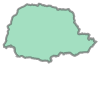

In [42]:
print('Estado: ' + brazil.nome[2])
brazil.geometry[2]

In [43]:
piv1 = piv1[['state','sales in millions']]
piv1.head(5)

,state,sales in millions
0,SP,437.110291
1,MG,291.075824
2,RJ,224.477404
3,RS,78.035754
4,PR,58.451038


In [44]:
brazil.rename({'sigla':'state'}, axis=1, inplace=True)

brazilmap = brazil.merge(piv1, on='state', how='left')
brazilmap[['state','sales in millions', 'geometry']].head(5)

,state,sales in millions,geometry
0,GO,13.191099,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,MS,7.370446,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,PR,58.451038,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,MG,291.075824,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,SE,2.744430,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


<AxesSubplot: >

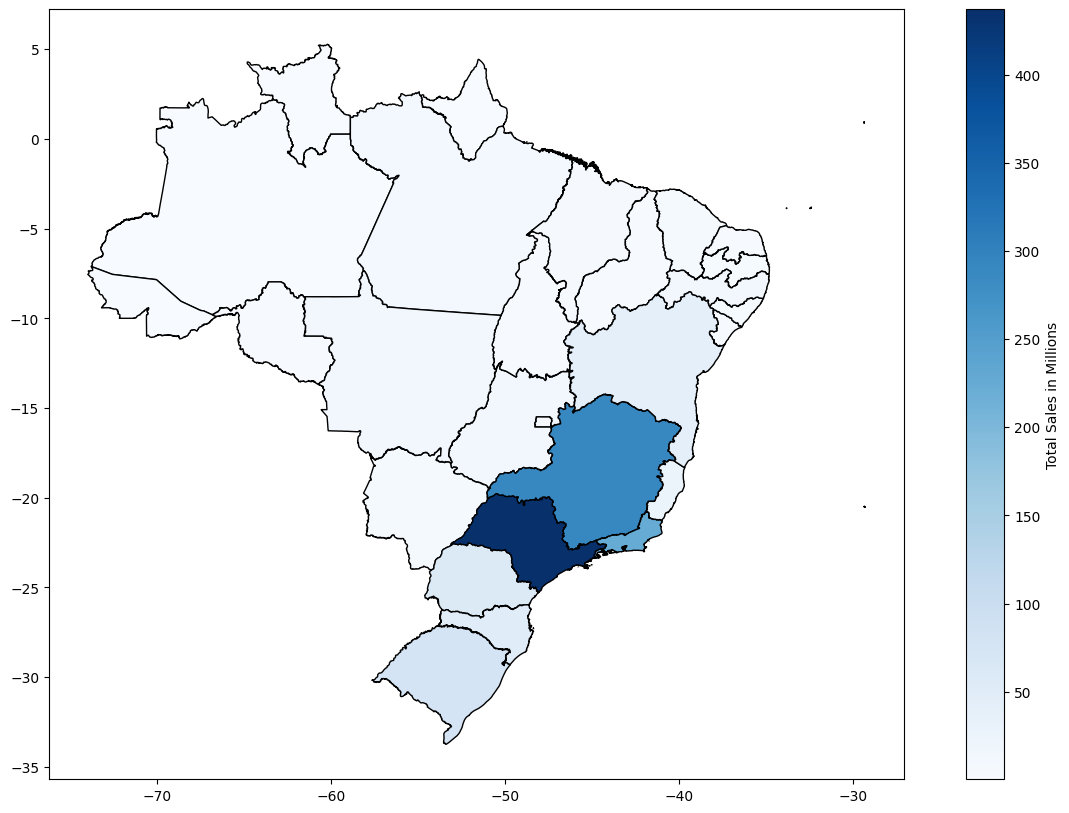

In [45]:
%matplotlib inline

brazilmap.plot(
    column = 'sales in millions',

    cmap = 'Blues',
    figsize = (16, 10),
    legend = True,
    legend_kwds = {'label':'Total Sales in Millions'},
    edgecolor = 'black'
)

Dari gambar di atas, kita dapat mengetahui bahwa penjualan terbanyak ditunjukkan oleh wilayah dengan kolom berwarna biru tua. Wilayah tersebut merupakan negara bagian dengan kode SP, yaitu Sao Paulo.

## OBJEKTIF 2: KATEGORI PRODUK YANG BANYAK DIPESAN DI WILAYAH OBJEKTIF 1

Negara dengan penjualan tertinggi ada di negara bagian dengan kode SP.

### PERSIAPAN TABEL KEDUA

TABEL PRODUCT : CEK DATA KOSONG

In [46]:
olist_pro.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

TABEL PRODUCT : CEK DATA DUPLIKAT

In [47]:
olist_pro[olist_pro.duplicated(keep=False)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
index,,,,,,,,,


TABEL TRANSLATION : CEK DATA KOSONG

In [48]:
olist_cn.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

TABEL TRANSLATION : CEK DATA DUPLIKAT

In [49]:
olist_cn[olist_cn.duplicated(keep=False)]

,product_category_name,product_category_name_english
index,,


TABEL TRANSLATION : CEK INKONSISTENSI DATA

In [50]:
olist_cn['product_category_name_english'].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [51]:
# Handling Inconsistent Data
inkonsis_data = {
    "home_confort": "home_comfort", 
    "home_comfort_2": "home_comfort", 
    "home_appliances_2":"home_appliances"
}
olist_cn = olist_cn.replace(inkonsis_data)
olist_cn['product_category_name_english'].unique()



array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_comfort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

### MERGE DATA 2

In [52]:
df2 = pd.merge(
    df1, olist_pro, on='product_id', how='left'
)
df2 = pd.merge(
    df2, olist_cn,on='product_category_name',how='left'
)

df2 = df2.drop(
    [
    'product_name_lenght','product_description_lenght',
    'city','zip_code','product_id',
    'product_photos_qty','product_weight_g',
    'product_length_cm','product_height_cm',
    'product_width_cm','product_category_name'
    ], 
    axis=1)

In [53]:
df2

,order_id,sales,state,lat,lon,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,58.9,RJ,-21.763009,-41.310799,cool_stuff
1,00010242fe8c5a6d1ba2dd792cb16214,58.9,RJ,-21.763009,-41.310799,cool_stuff
2,00010242fe8c5a6d1ba2dd792cb16214,58.9,RJ,-21.763009,-41.310799,cool_stuff
3,00010242fe8c5a6d1ba2dd792cb16214,58.9,RJ,-21.763009,-41.310799,cool_stuff
4,00010242fe8c5a6d1ba2dd792cb16214,58.9,RJ,-21.763009,-41.310799,cool_stuff
...,...,...,...,...,...,...
10831631,fffe41c64501cc87c801fd61db3f6244,43.0,SP,-22.916039,-48.441094,bed_bath_table
10831632,fffe41c64501cc87c801fd61db3f6244,43.0,SP,-22.916039,-48.441094,bed_bath_table
10831633,fffe41c64501cc87c801fd61db3f6244,43.0,SP,-22.916039,-48.441094,bed_bath_table
10831634,fffe41c64501cc87c801fd61db3f6244,43.0,SP,-22.916039,-48.441094,bed_bath_table


### OLAH DATA 2

In [54]:
df2.rename({'product_category_name_english':'category'}, axis=1, inplace=True)

In [55]:
df2 = df2[df2['state']=='SP']
piv2 = df2.groupby('category')[['state','sales']].sum().sort_values('sales', ascending=False).reset_index()
piv2['Total Sales in Thousands'] = piv2['sales']/1000
piv2 = piv2[['category','Total Sales in Thousands']]
piv2.tail()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11820\3459671824.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  piv2 = df2.groupby('category')[['state','sales']].sum().sort_values('sales', ascending=False).reset_index()


,category,Total Sales in Thousands
63,la_cuisine,72.75100
64,arts_and_craftmanship,64.77239
65,flowers,34.80561
66,cds_dvds_musicals,17.38500
67,fashion_childrens_clothes,13.06853


### VISUALISASI 2

<AxesSubplot: xlabel='Total Sales in Thousands', ylabel='category'>

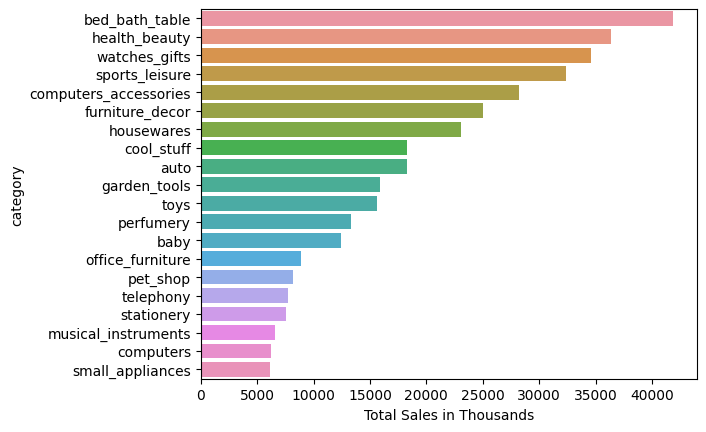

In [56]:
#20 kategori dengan penjualan tertinggi
sns.barplot(piv2[0:20], x='Total Sales in Thousands', y='category')

<AxesSubplot: xlabel='Total Sales in Thousands', ylabel='category'>

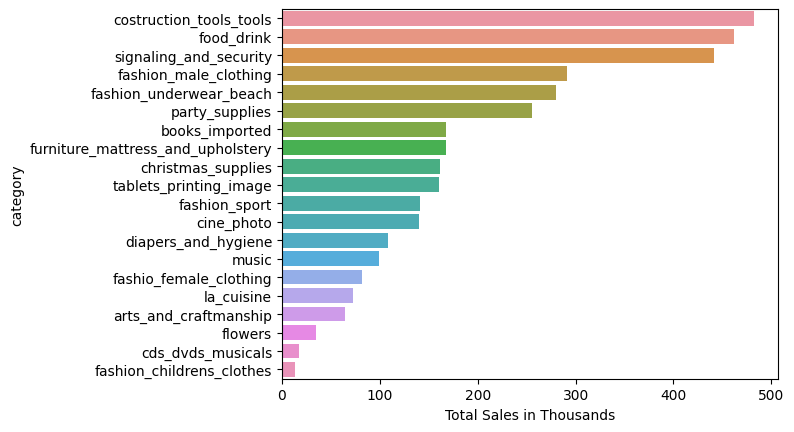

In [57]:
#20 kategori dengan penjualan terendah
end_data = len(piv2)
sns.barplot(piv2[end_data-20:end_data], x='Total Sales in Thousands', y='category')

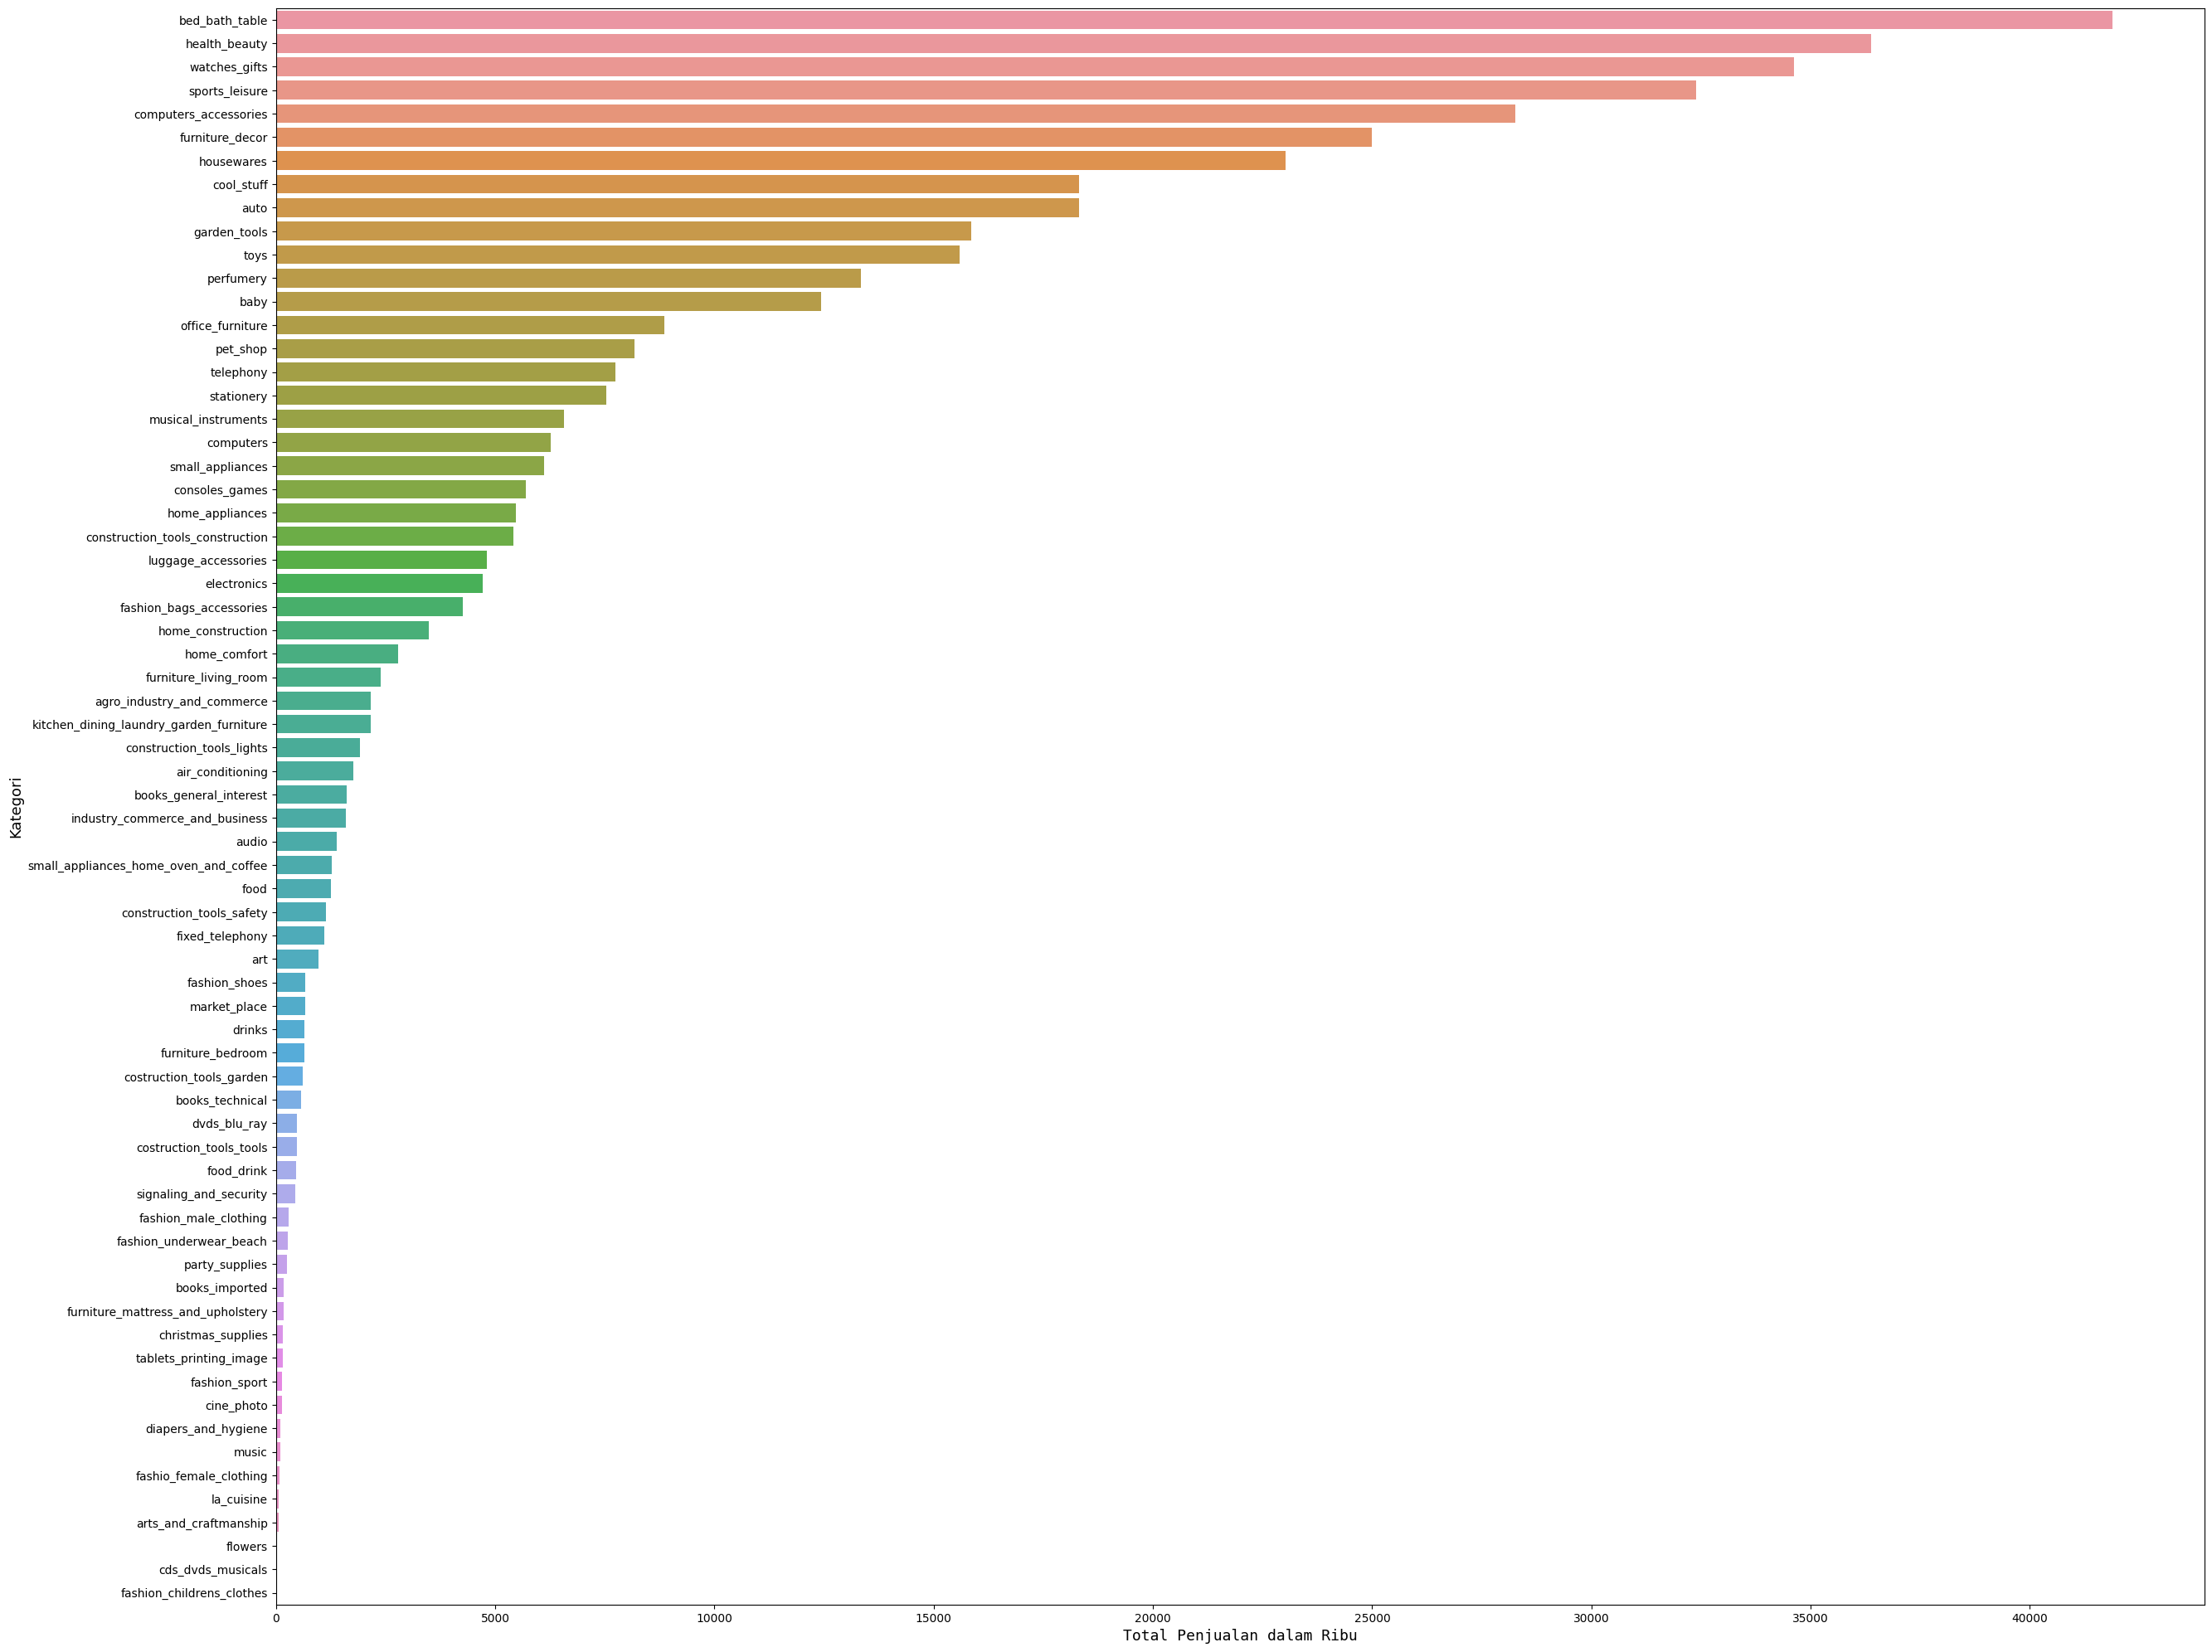

In [58]:
#ubah ukuran figure dengan figsize
end_data = len(piv2)
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(30,25))

#Barplot Kategori Produk dengan Total Penjualan 
sns.barplot(piv2,x='Total Sales in Thousands',y='category',ax=ax)

# Ubah Label Y
ax.set_ylabel(
    'Kategori',
    fontsize = 13
)

# Ubah Label X
ax.set_xlabel(
    'Total Penjualan dalam Ribu',
    fontsize = 13,
    fontfamily = 'monospace'
)

plt.show()

Dari sini, dapat kita ketahui bahwa kategori produk yang paling banyak dibeli di Sao Paulo, meliputi kategori bed_bath_table, health_beauty, watches_gifts, sport_leisures, computer_accessories, dan lain-lain.

## OBJEKTIF 3: REVIEW TIAP KATEGORI BERDASARKAN SKOR REVIEW

### PERSIAPAN TABEL KETIGA

TABEL ORDER REVIEW : CEK DATA KOSONG

In [59]:
olist_orev.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

TABEL ORDER REVIEW : CEK DATA DUPLIKAT

In [60]:
olist_orev[olist_orev.duplicated(keep=False)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
index,,,,,,,


### MERGE DATA 3

In [61]:
df3 = pd.merge(
    df2, olist_orev, on='order_id',how='left'
)
df3 = df3.drop(
    [
    'order_id', 'review_id','review_comment_title','review_comment_message',
    'review_creation_date','review_answer_timestamp'
    ], axis=1
)

In [62]:
df3

,sales,state,lat,lon,category,review_score
0,239.9,SP,-20.205187,-50.927017,pet_shop,4.0
1,239.9,SP,-20.205187,-50.927017,pet_shop,4.0
2,239.9,SP,-20.205187,-50.927017,pet_shop,4.0
3,239.9,SP,-20.205187,-50.927017,pet_shop,4.0
4,239.9,SP,-20.205187,-50.927017,pet_shop,4.0
...,...,...,...,...,...,...
3952396,43.0,SP,-22.916039,-48.441094,bed_bath_table,5.0
3952397,43.0,SP,-22.916039,-48.441094,bed_bath_table,5.0
3952398,43.0,SP,-22.916039,-48.441094,bed_bath_table,5.0
3952399,43.0,SP,-22.916039,-48.441094,bed_bath_table,5.0


### OLAH DATA 3

Buat Pivot Tabel berdasarkan kategori dan skor review

In [63]:
piv3 = df3.drop([
    'sales'
], axis=1)
piv3 = piv3.groupby(['category','review_score']).count().reset_index()
piv3 = piv3.rename({'state':'total'}, axis=1)
piv3

,category,review_score,total,lat,lon
0,agro_industry_and_commerce,1.0,627,627,627
1,agro_industry_and_commerce,2.0,227,227,227
2,agro_industry_and_commerce,3.0,227,227,227
3,agro_industry_and_commerce,4.0,2756,2756,2756
4,agro_industry_and_commerce,5.0,3962,3962,3962
...,...,...,...,...,...
311,watches_gifts,1.0,17483,17483,17483
312,watches_gifts,2.0,4741,4740,4740
313,watches_gifts,3.0,15823,15823,15823
314,watches_gifts,4.0,35607,35607,35607


In [64]:
pivot3 = pd.pivot(
    piv3,
    index='category',
    columns='review_score',
    values='total'
)
pivot3

review_score,1.0,2.0,3.0,4.0,5.0
category,,,,,
agro_industry_and_commerce,627.0,227.0,227.0,2756.0,3962.0
air_conditioning,1354.0,266.0,796.0,2543.0,6552.0
art,3960.0,482.0,621.0,1114.0,3794.0
arts_and_craftmanship,107.0,NaN,265.0,112.0,867.0
audio,1253.0,457.0,833.0,2890.0,6062.0
...,...,...,...,...,...
stationery,4842.0,2270.0,5355.0,16070.0,59912.0
tablets_printing_image,NaN,30.0,25.0,428.0,1620.0
telephony,18064.0,4805.0,11480.0,29616.0,65939.0


In [65]:
# Dibagi 3 Tingkat Kepuasan
piv32 = piv3
piv32['Skor Kepuasan'] = 'Tidak Puas'
piv32['Skor Kepuasan'][piv32['review_score']==3] = 'Netral'
piv32['Skor Kepuasan'][piv32['review_score']>3] = 'Puas'
piv32['Skor Kepuasan'].unique()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11820\4024699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  piv32['Skor Kepuasan'][piv32['review_score']==3] = 'Netral'
C:\Users\ACER\AppData\Local\Temp\ipykernel_11820\4024699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  piv32['Skor Kepuasan'][piv32['review_score']>3] = 'Puas'


array(['Tidak Puas', 'Netral', 'Puas'], dtype=object)

In [66]:
piv32

,category,review_score,total,lat,lon,Skor Kepuasan
0,agro_industry_and_commerce,1.0,627,627,627,Tidak Puas
1,agro_industry_and_commerce,2.0,227,227,227,Tidak Puas
2,agro_industry_and_commerce,3.0,227,227,227,Netral
3,agro_industry_and_commerce,4.0,2756,2756,2756,Puas
4,agro_industry_and_commerce,5.0,3962,3962,3962,Puas
...,...,...,...,...,...,...
311,watches_gifts,1.0,17483,17483,17483,Tidak Puas
312,watches_gifts,2.0,4741,4740,4740,Tidak Puas
313,watches_gifts,3.0,15823,15823,15823,Netral
314,watches_gifts,4.0,35607,35607,35607,Puas


In [67]:
piv32 = piv32.drop([
    'lat','lon','review_score'
], axis=1)
piv32 = piv32.groupby(['category','Skor Kepuasan']).sum().reset_index()
piv32

,category,Skor Kepuasan,total
0,agro_industry_and_commerce,Netral,227
1,agro_industry_and_commerce,Puas,6718
2,agro_industry_and_commerce,Tidak Puas,854
3,air_conditioning,Netral,796
4,air_conditioning,Puas,9095
...,...,...,...
192,toys,Puas,113405
193,toys,Tidak Puas,17476
194,watches_gifts,Netral,15823
195,watches_gifts,Puas,146295


In [68]:
pivot32 = pd.pivot(
    piv32,
    index='category',
    columns='Skor Kepuasan',
    values='total'
)
pivot32

Skor Kepuasan,Netral,Puas,Tidak Puas
category,,,
agro_industry_and_commerce,227.0,6718.0,854.0
air_conditioning,796.0,9095.0,1620.0
art,621.0,4908.0,4442.0
arts_and_craftmanship,265.0,979.0,107.0
audio,833.0,8952.0,1710.0
...,...,...,...
stationery,5355.0,75982.0,7112.0
tablets_printing_image,25.0,2048.0,30.0
telephony,11480.0,95555.0,22869.0


### VISUALISASI 3

<AxesSubplot: xlabel='review_score', ylabel='category'>

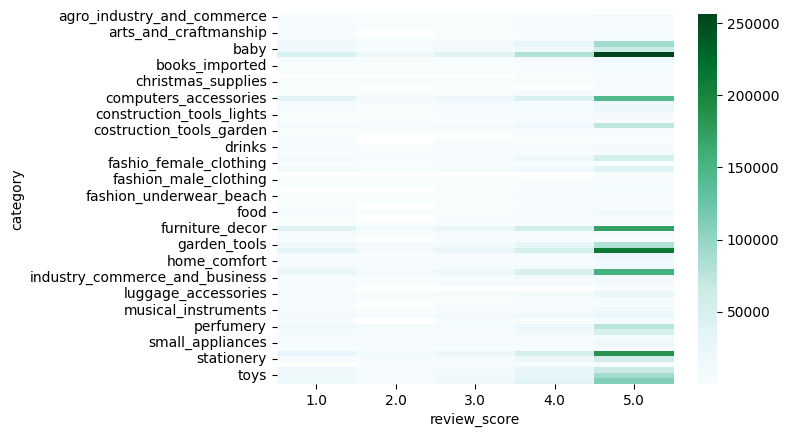

In [69]:
sns.heatmap(pivot3,cmap="BuGn")

<AxesSubplot: xlabel='Skor Kepuasan', ylabel='category'>

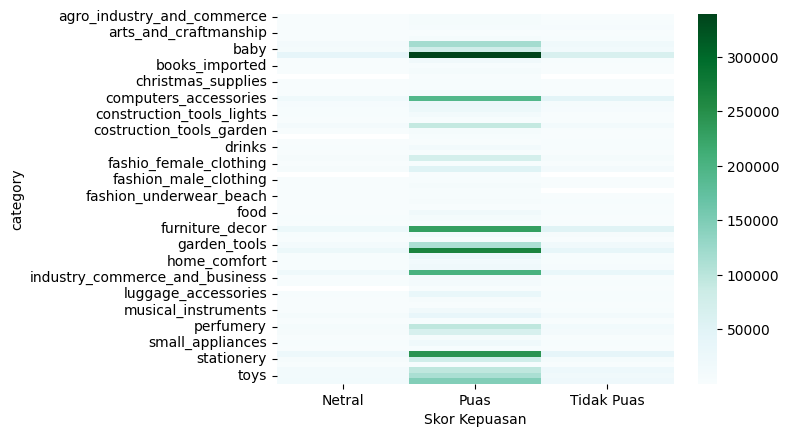

In [70]:
sns.heatmap(pivot32,cmap="BuGn")

### OLAH DATA & VISUALISASI 3.2

In [168]:
dfpiv = pd.DataFrame(pivot32).reset_index()
dfpiv

Skor Kepuasan,category,Netral,Puas,Tidak Puas
0,agro_industry_and_commerce,227.0,6718.0,854.0
1,air_conditioning,796.0,9095.0,1620.0
2,art,621.0,4908.0,4442.0
3,arts_and_craftmanship,265.0,979.0,107.0
4,audio,833.0,8952.0,1710.0
...,...,...,...,...
63,stationery,5355.0,75982.0,7112.0
64,tablets_printing_image,25.0,2048.0,30.0
65,telephony,11480.0,95555.0,22869.0
66,toys,10892.0,113405.0,17476.0


In [171]:
dfpiv.isna().sum()

Skor Kepuasan
category      0
Netral        4
Puas          0
Tidak Puas    3
dtype: int64

In [172]:
dfpiv.fillna(0, inplace=True)
dfpiv.isna().sum()


Skor Kepuasan
category      0
Netral        0
Puas          0
Tidak Puas    0
dtype: int64

<AxesSubplot: >

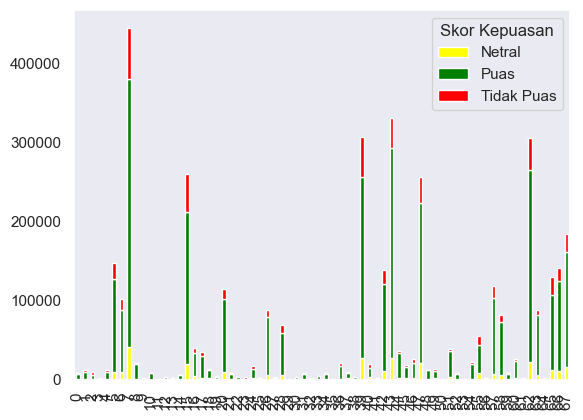

In [173]:
dfpiv.plot(kind='bar', stacked=True, color=['yellow', 'green','red'])


Karena akan sulit membaca grafik seperti ini, maka akan dibuat dalam skala 100%.

In [174]:
dfpiv['jumlah'] = dfpiv['Netral']+dfpiv['Puas']+dfpiv['Tidak Puas']
dfpiv['Netral'] = dfpiv['Netral']/dfpiv['jumlah']*100
dfpiv['Puas'] = dfpiv['Puas']/dfpiv['jumlah']*100
dfpiv['Tidak Puas'] = dfpiv['Tidak Puas']/dfpiv['jumlah']*100
dfpiv.drop('jumlah', axis=1, inplace=True)

In [175]:
dfpiv = dfpiv[['category','Puas','Netral','Tidak Puas']]
dfpiv

Skor Kepuasan,category,Puas,Netral,Tidak Puas
0,agro_industry_and_commerce,86.139249,2.910630,10.950122
1,air_conditioning,79.011380,6.915125,14.073495
2,art,49.222746,6.228061,44.549193
3,arts_and_craftmanship,72.464841,19.615100,7.920059
4,audio,77.877338,7.246629,14.876033
...,...,...,...,...
63,stationery,85.904872,6.054336,8.040792
64,tablets_printing_image,97.384689,1.188778,1.426534
65,telephony,73.558166,8.837295,17.604539
66,toys,79.990548,7.682704,12.326748


In [176]:
dfpiv.set_index('category',inplace=True)

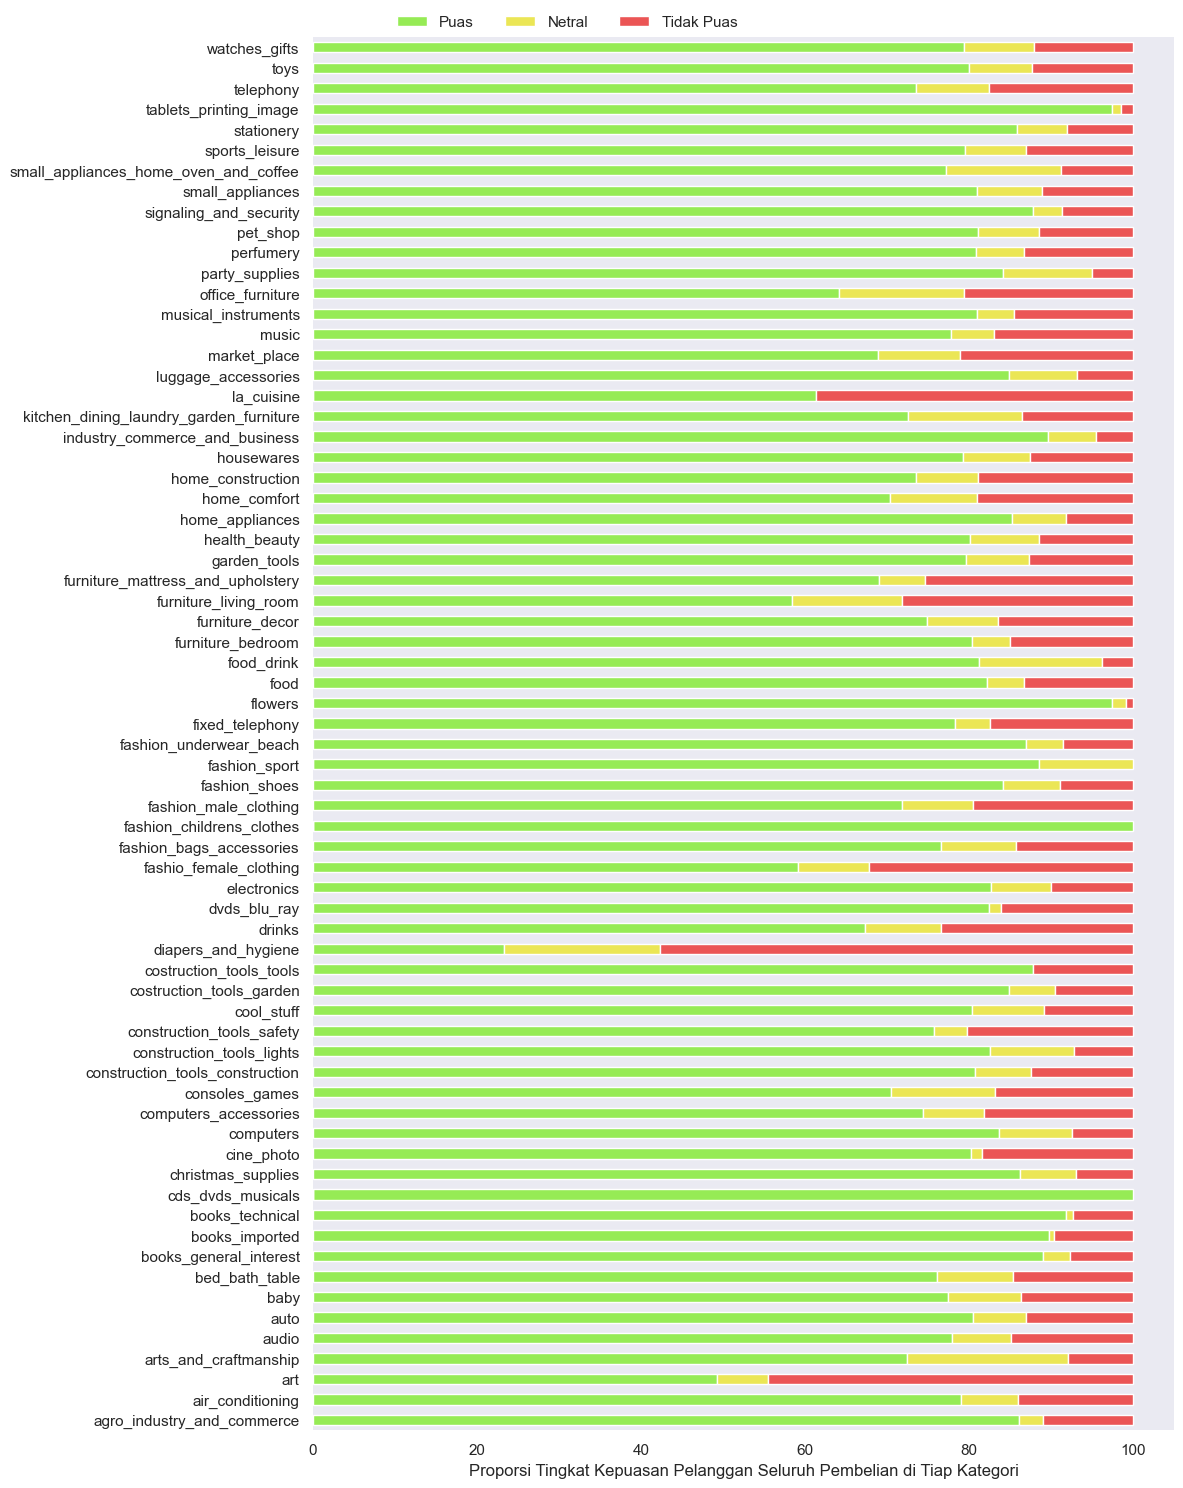

In [177]:
f, ax = plt.subplots(figsize=(12, 15))

sns.set_theme(style="dark")
sns.set_color_codes("deep")
dfpiv.plot.barh(stacked=True,ax=ax,color=['#96EB55','#EBE655','#EB5555'])
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="upper right",
        borderaxespad=0,
        frameon=False,
        ncol=3
    )

ax.set_xlabel('Proporsi Tingkat Kepuasan Pelanggan Seluruh Pembelian di Tiap Kategori')
ax.set_ylabel('')
sns.despine(left=True, bottom=True)
plt.tight_layout()

Dari sini, kita dapat mengetahui bahwa beberapa kategori produk memiliki tingkat kepuasan yang baik di mata pelanggan, tetapi ada beberapa kategori produk dengan tingkat kepuasannya 'Tidak Puas' yang cukup tinggi.